# Data Visualization

let's practice what we have learned so far and visualize some data !

## Data description

Survived: Survival (0 = No; 1 = Yes).

pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd).

name: Name.

sex: Sex.

age: Age.

sibsp: Number of Siblings/Spouses Aboard.

parch: Number of Parents/Children Aboard.

ticket: Ticket Number.

fare: Passenger Fare.

cabin: Cabin.

embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### In order to validate this checkpoint you are asked to accomplish the following tasks:

## 1- Preprocessing part 

After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values

As a next step apply what you have learned in the course to preprocess your data: find missing informations and replace them by the appropriate values.

Verify that your data is ready to be treated.

In [214]:
import seaborn as sns
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [215]:
df = pd.read_csv('titanic-passengers.csv')

In [216]:
df.shape

(891, 12)

In [217]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [218]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [220]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [221]:
df.isnull().sum().sum()

866

In [222]:
df = df.drop(['Cabin'], axis = 1)

In [223]:
df=df.dropna(subset = ['Embarked'])
df['Age']=df['Age'].fillna(df['Age'].median())

In [224]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 2. Visualization part

Let’s begin now the data visualization part : 

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem  

Visualize the correlation between Sex and Age in a plot of your choosing, the visualized plot should give us obvious deductions concerning the importance of age and Sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals

In [225]:
df.shape

(889, 11)

In [226]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887
1,444.358824,1.955882,28.163735,0.476471,0.467647,48.209498


In [227]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.740385
male,0.188908


In [228]:
male_nb = len(df[df['Sex'] == 'male'])
print("No of Males in Titanic:",male_nb)

No of Males in Titanic: 577


In [229]:
female_nb = len(df[df['Sex'] == 'female'])
print("No of Females in Titanic:",female_nb)

No of Females in Titanic: 312


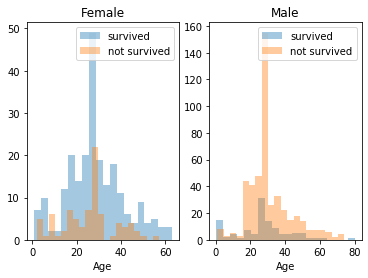

In [230]:
#Plotting correlation between Sex and Age 
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2)
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age,bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age,bins=20, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age,bins=20,  label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age,bins=20, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
#The Chart confirms Women more likely survivied than Men.

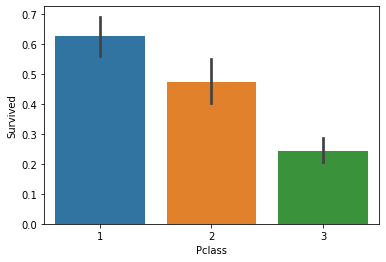

In [231]:
sns.barplot(x='Pclass', y='Survived', data=df)

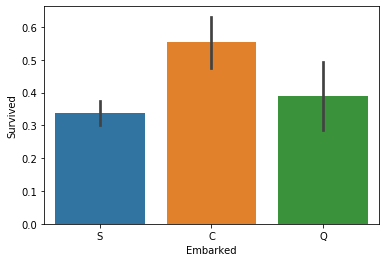

In [232]:
sns.barplot(x='Embarked', y='Survived', data=df)

In [233]:
#check relation between 2 variables 
#if correlation is >0 both variables change in the same direction 
#if correlation is <0 both variables change in the opposite direction 
#else there is no relationship between both variables
#determine the most important reasons passangers survived the Titanic sinking 

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

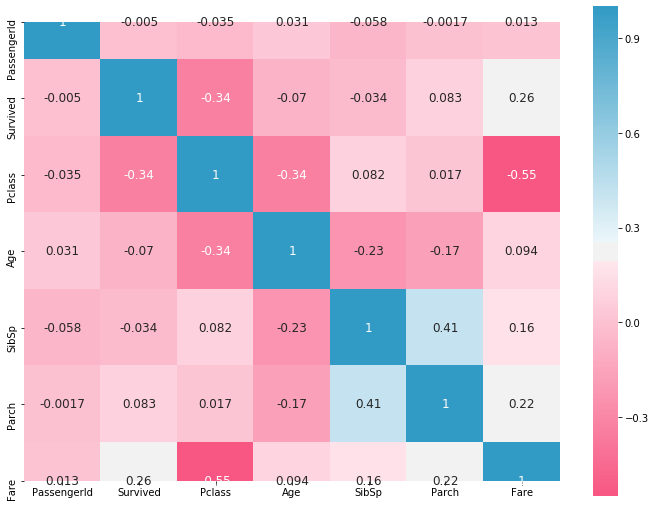

In [234]:
plot_correlation_map(df)

Use the groupby function combined with the mean() to view the relation between Pclass and survived.

In [235]:
df.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


As a final step try to drop the useless columns such as Names

In fact, we dropped the column Names because we evaluated it as useless, well that's not the case, we can create a very useful feature from the names

your task now is to create a new column called Title which contain the appropriate Title for each individual ( hint : extract the title from the column Names)

Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)

As you should've seen, there is a lot of titles which makes the feature not very practical, let's try to group these titles into more useful ones

hint: use the following dictionary

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs

                    "Master" :    "Master"

                    }

let's visualize the same correlations using these new titles now.


In [236]:
df = df.drop (columns=['PassengerId'])
df = df.drop (columns=['Ticket'])

title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = df[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


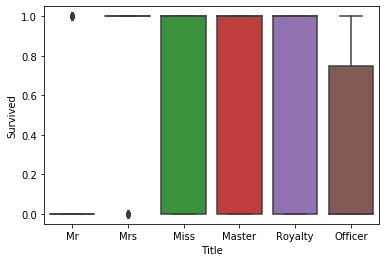

In [237]:
sns.boxplot(x=title['Title'], y='Survived', data=df)

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not

In [238]:
family = pd.DataFrame()
#print (df[ 'Parch' ])
#print(df[ 'SibSp' ])
# introducing a new feature : the size of families
family[ 'FamilySize' ] = df[ 'Parch' ] + df[ 'SibSp' ] 
# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4  else 0)
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s  else 0)

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,1,1,0,0
1,1,1,0,0
2,0,0,0,0
3,1,1,0,0
4,0,0,0,0


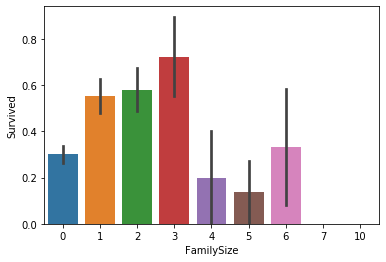

In [239]:
sns.barplot(x=family['FamilySize'], y='Survived', data=df)